In [0]:
import keras
keras.__version__

In [97]:
mnist.load_data()

AttributeError: ignored

In [0]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [78]:
len(mnist.load_data()) # 일단 이렇게 총 2개로 나온다.

2

In [79]:
mnist.load_data() # 열어보면 [[train, label], [test, label]] 이런 식인듯 하다.

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [80]:
[len(i) for i in mnist.load_data()]

[2, 2]

In [81]:
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


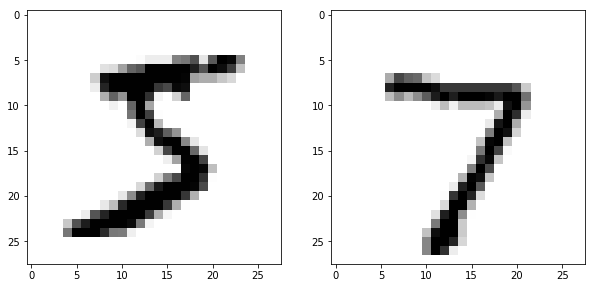

In [82]:
## matplotlib을 이용해서 images들을 한 번 까보자.
import matplotlib.pyplot as plt
_, ax = plt.subplots(1, 2, figsize = (10, 5))
ax[0].imshow(train_images[0], cmap = plt.cm.binary)
ax[1].imshow(test_images[0], cmap = plt.cm.binary)
plt.show()

## 학습 순서
- 1. train_image를 network에 주입
- 2. network가 image와 label을 연관해서 학습
- 3. test image에 대한 predict를 network에게 요청

In [0]:
from keras import models # 꼭 해야함, keras만 불러 온다고 되지 않는듯
from keras import layers # 꼭 해야함, keras만 불러 온다고 되지 않는듯
import tensorflow as tf
network = models.Sequential()
network.add(layers.Dense(512, activation = 'relu', input_shape = (28 * 28, )))
network.add(layers.Dense(10, activation = 'softmax'))

신경망이 훈련 준비를 마치기 위해서 컴파일 단계에 포함될 세 가지가 더 필요합니다:

* 손실 함수 : 훈련 데이터에서 신경망의 성능을 측정하는 방법으로 네트워크가 옳은 방향으로 학습될 수 있도록 도와 줍니다.
* 옵티마이저: 입력된 데이터와 손실 함수를 기반으로 네트워크를 업데이트하는 메커니즘입니다.
* 훈련과 테스트 과정을 모니터링할 지표 : 여기에서는 정확도(정확히 분류된 이미지의 비율)만 고려하겠습니다.

손실 함수와 옵티마이저의 정확한 목적은 이어지는 두 개의 장에서 자세히 설명하겠습니다.

In [0]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [85]:
print(train_images[0][0][0], type(train_images[0][0][0]))

0 <class 'numpy.uint8'>


In [86]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [0]:
# 훈련 데이터는 0~255 사이 값으로 되어 있음(흰~검 색 표시인듯)
# 60000, 28, 28을 0~1로 해주고, float타입의 60000, 28 * 28로 바꿔주자

In [88]:
train_images = train_images.reshape(60000, 28 * 28)
print(train_images)
train_images = train_images.astype('float32')/255
print(train_images)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [89]:
print(test_images.shape)
test_images = test_images.reshape(10000, 28 * 28)
print(test_images.shape)
test_images = test_images.astype('float32')/255
print(test_images.shape)

(10000, 28, 28)
(10000, 784)
(10000, 784)


In [90]:
train_labels[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [91]:
# 범주형으로 인코딩
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
train_labels[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [92]:
network.fit(train_images, train_labels, epochs = 5, batch_size = 128)

Epoch 1/5
60000/60000 [==============================] - 3s 42us/step - loss: 0.2576 - acc: 0.9259
Epoch 2/5
60000/60000 [==============================] - 2s 39us/step - loss: 0.1038 - acc: 0.9689
Epoch 3/5
60000/60000 [==============================] - 2s 39us/step - loss: 0.0683 - acc: 0.9790
Epoch 4/5
60000/60000 [==============================] - 2s 39us/step - loss: 0.0492 - acc: 0.9853
Epoch 5/5
60000/60000 [==============================] - 2s 39us/step - loss: 0.0366 - acc: 0.9889


In [93]:
loss, acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 62us/step


In [94]:
print(loss, acc)

0.07159033829784021 0.9795
